In [46]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
label_path = './input/labels.csv'
image_path = './input/head_ct/head_ct'

label_df = pd.read_csv(label_path)
image_files = sorted(glob.glob(image_path + '/*.png'))

In [77]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import random


# 读取图像
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # 可根据需要调整图像大小
    return img.flatten()  # 将图像转化为一维数组


# 读取标签数据
label_df = pd.read_csv('./input/labels.csv')
labels = label_df[' hemorrhage']

# 读取图像数据并进行预处理
images = []
for i in range(0, 200):
    image_filename = image_path + f'/{i:03}.png'
    images.append(read_image(image_filename))

# 转化为numpy数组，这样才能喂入机器学习模型
images = np.array(images)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

# KNN
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)

# SVM
svm_model = svm.SVC(probability=True)
svm_model.fit(X_train, y_train)

# 使用K折交叉验证
kf = KFold(n_splits=6, shuffle=True)

for train_index, test_index in kf.split(X_train):
    X_trainT, X_testT = images[train_index], images[test_index]
    y_trainT, y_testT = labels[train_index], labels[test_index]
    knn.fit(X_trainT, y_trainT)
    svm_model.fit(X_trainT, y_trainT)
    acc = knn.score(X_testT, y_testT) * 100
    print("KNN" + str(acc))
    acc = svm_model.score(X_testT, y_testT) * 100
    print("SVM" + str(acc) + "\n")



KNN58.333333333333336
SVM79.16666666666666

KNN79.16666666666666
SVM79.16666666666666

KNN65.21739130434783
SVM65.21739130434783

KNN73.91304347826086
SVM69.56521739130434

KNN65.21739130434783
SVM82.6086956521739

KNN82.6086956521739
SVM69.56521739130434



In [78]:

# 模型评估
# KNN
acc = knn.score(X_test, y_test) * 100
print(acc)
knn_y_pred = knn.predict_proba(X_test)[:, 1]
print(knn_y_pred)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_pred)
knn_auc = auc(knn_fpr, knn_tpr)


65.0
[0.6 0.2 0.2 0.6 0.4 0.6 1.  0.2 0.4 0.4 0.2 0.6 0.  0.2 0.4 0.6 0.6 0.6
 0.2 0.8 0.4 0.8 0.4 0.2 0.2 1.  0.4 0.6 1.  0.4 0.8 0.2 0.2 0.8 0.8 0.6
 0.  0.4 0.8 0.6 0.6 0.4 0.6 0.8 0.8 0.6 0.6 1.  0.6 0.6 0.6 0.6 0.6 0.8
 0.6 0.8 0.4 0.4 0.6 0.2]


In [79]:

# SVM
acc = svm_model.score(X_test, y_test) * 100
print(acc)
svm_y_pred = svm_model.predict_proba(X_test)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_pred)
svm_auc = auc(svm_fpr, svm_tpr)

58.333333333333336


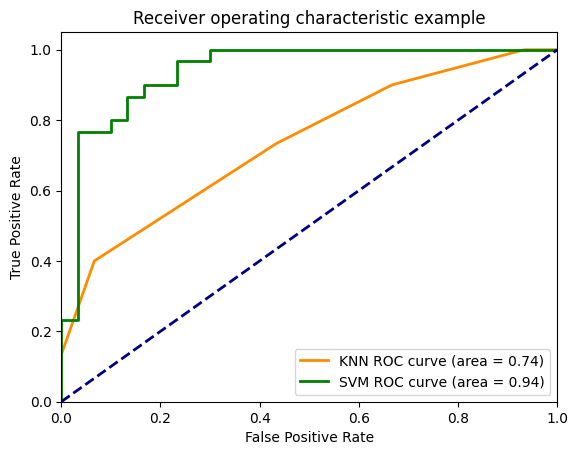

KNN Confusion Matrix: 
 [[17 13]
 [ 8 22]]
SVM Confusion Matrix: 
 [[ 5 25]
 [ 0 30]]


In [80]:

# 绘制ROC曲线
plt.figure()
plt.plot(knn_fpr, knn_tpr, color='darkorange', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label='SVM ROC curve (area = %0.2f)' % svm_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()  # 混淆矩阵
knn_pred = knn.predict(X_test)
svm_pred = svm_model.predict(X_test)
print("KNN Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
print("SVM Confusion Matrix: \n", confusion_matrix(y_test, svm_pred))